In [1]:
%matplotlib inline
import pandas as pd

In [3]:
compras_df = pd.read_csv('/content/enriched.csv')

## Probar un modelo Supervisado

In [4]:
data = compras_df.copy()
for i, column in enumerate(list([str (d) for d in data.dtypes])):
  if column == 'object':
    data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].mode())
    data[data.columns[i]] = data[data.columns[i]].astype('category').cat.codes
  else: 
    data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].median())


In [5]:
data.head(5)

,NUM BEN,BENEFICIARIO,RFC,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET,DIA,MES,ANO,BENEFICIARIO_SALES,IMPORTE_GASTO_PROMEDIO,HAS_LINKEDIN_SITE
0,110152,161,167,1388,130,780,1,1019110.0,8,14911.80,2,11,12,2020,13,881659.731797,True
1,110152,161,167,1389,135,845,1,1019110.0,8,2528.80,2,11,12,2020,13,881659.731797,True
2,110152,161,167,1390,132,759,1,1019110.0,8,8500.02,2,11,12,2020,13,881659.731797,True
3,110152,161,167,1391,131,757,1,1019110.0,8,2400.01,2,11,12,2020,13,881659.731797,True
4,110152,161,167,1392,417,859,1,299001496.0,16,1537.00,2,23,12,2020,13,881659.731797,True


In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [7]:
y = data.pop('IMPORTE')
X = data.copy()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
clf = RandomForestRegressor(n_estimators=1000, max_depth=4, )

In [10]:
clf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=1000)

In [11]:
from sklearn.metrics import r2_score

In [12]:
r2_score(y_test, clf.predict(X_test))

0.1791854834618004

## Probar un modelo no supervisado o de clustering para texto





In [13]:
import nltk 
nltk.download('book')
from nltk.book import *
from nltk.corpus import stopwords
import gensim
import numpy as np
np.random.seed(2021)

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [14]:
def preprocess(text):
  result=[]
  for token in text.split():
    if token not in stopwords.words('spanish') and len(token)>4:
      result.append(token)
    return result

In [15]:
process_business = [preprocess(x) for x in list(compras_df['BENEFICIARIO'].unique())]

In [16]:
dictionary = gensim.corpora.Dictionary(process_business)

In [17]:
dictionary.filter_extremes(no_below=1, no_above=0.5)

In [18]:
bow_corpus = [dictionary.doc2bow(doc) for doc in process_business]

In [19]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=6, id2word=dictionary, passes=10, workers=2)

In [20]:
for idx, type_business in lda_model.print_topics(-1):
  print('Topic:{} Words{}'.format(idx, type_business))

Topic:0 Words0.068*"RODRIGUEZ" + 0.055*"INSTITUTO" + 0.042*"BANCO" + 0.029*"CANTU" + 0.029*"UNIVERSIDAD" + 0.029*"HERNANDEZ" + 0.029*"SERVICIO" + 0.029*"GRUPO" + 0.028*"RAMOS" + 0.015*"ESPINOSA"
Topic:1 Words0.085*"GARCIA" + 0.044*"PEREZ" + 0.030*"LOZANO" + 0.030*"VARGAS" + 0.030*"MORENO" + 0.030*"INTEGRACION" + 0.030*"INMOBILIARIA" + 0.016*"MELCHOR" + 0.016*"LOGOMUNDO," + 0.016*"MADERA"
Topic:2 Words0.123*"CONSTRUCTORA" + 0.056*"SEGUROS" + 0.042*"TREVIÑO" + 0.029*"GUERRERO" + 0.016*"PRAXAIR" + 0.016*"F/4086906" + 0.016*"CORONEL" + 0.016*"AYALA" + 0.016*"CERVEZAS" + 0.016*"VERGARA"
Topic:3 Words0.068*"CONSTRUCCIONES" + 0.055*"DESARROLLOS" + 0.042*"VILLARREAL" + 0.015*"BENITES" + 0.015*"TIJERINA" + 0.015*"INDUSTRIAS" + 0.015*"HOSP.UNIVERSITARIO" + 0.015*"FIDEICOMISO" + 0.015*"VALLEJO" + 0.015*"EDIFICIOS"
Topic:4 Words0.031*"CENTRO" + 0.031*"DESARROLLO" + 0.017*"TRACTORES" + 0.017*"FORTERRA," + 0.017*"MAYORGA" + 0.017*"FLORES" + 0.017*"PADILLA" + 0.017*"CORPUS" + 0.017*"IIRSACERO," + 0.0

In [21]:
def get_max_topic(index):
  results = lda_model[bow_corpus[index]]
  return max(lda_model[results], key=lambda x: x[1])[0]

In [22]:
business_cluster = {x:get_max_topic(i) for i, x in enumerate(list(compras_df['BENEFICIARIO'].unique()))}

In [23]:
business_cluster 

{'LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.': 2,
 'GH MAQUINARIA Y EQUIPO, S.A.DE C.V.': 2,
 'PLOMIFERRETERA EL TORNILLO, S.A. DE C.V.': 3,
 'EQUIPOS Y ACCESORIOS CANTU, S.A. DE C.V.': 2,
 'PRAXAIR MEXICO S. DE R.L. DE C.V.': 2,
 'COMERCIALIZADORA HNOS.ALVAREZ FLORES,S.A.DE C.V.': 2,
 'DISTRIBUIDORA DE FRUTAS Y LEGUMBRES LA HORTALIZA,S.A.DE C.V.': 2,
 'NUÑEZ LOPEZ VIRGINIA': 2,
 'S.I.M.E.P.R.O.D.E.': 2,
 'TRACTORES Y MAQUINARIA REAL, S.A. DE C.V.': 5,
 'TELEFONOS DE MEXICO,S.A.B DE C.V.': 2,
 'MERCANTIL DISTRIBUIDORA, S.A. DE C.V.': 2,
 'GRANA,S.A.': 3,
 'CLUB INTERNACIONAL DE MONTERREY,A.C.': 2,
 'EMPACADORA Y DISTR.DE CARNES FINAS SAN JUAN,S.A.DE C.V.': 3,
 'VIVERO EL ESCORIAL, S.A. DE C.V.': 0,
 'CAR ONE AMERICANA,S.A.DE C.V.': 2,
 'MANTENIMIENTO ELECTRICO DE POTENCIA,S.A.DE C.V.': 0,
 'AUTOKAM REGIOMONTANA,S.A.DE C.V.': 3,
 'CLIMEEZ DEL NORTE,S.A.DE C.V.': 2,
 'VALUE ARRENDADORA,S.A.DE C.V. SOFOM ER VALUE GPO.FIN.': 5,
 'SEGUROS AFIRME, S.A. DE C.V. AFIRME GRUPO FINANCIERO': 2

In [24]:
compras_df['CLUSTER_NAME'] = compras_df['BENEFICIARIO'].apply(lambda x: business_cluster[x])

<Axes: xlabel='CLUSTER_NAME'>

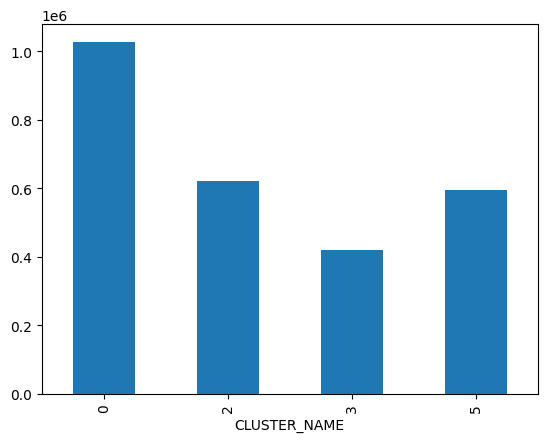

In [25]:
compras_df.groupby('CLUSTER_NAME')['IMPORTE'].mean().plot.bar()

# Probar un modelo no supervisado de anomalias en cuanto importancia

In [28]:
import numpy as np
from scipy.stats import norm

In [30]:
params = norm.fit(compras_df['IMPORTE'])
params

(626317.9473441559, 4665396.47441213)

<Axes: >

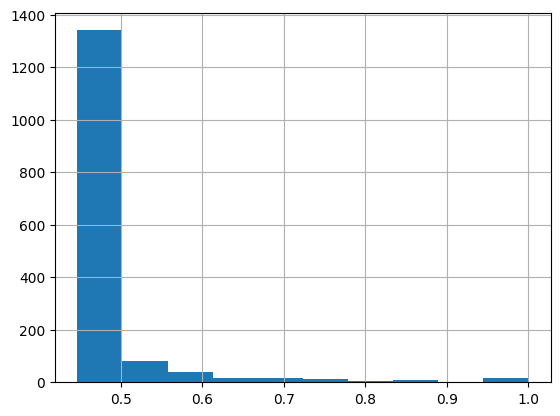

In [35]:
compras_df['PROB_TOTAL'] = [norm(params[0], params[1]).cdf(x) for x in compras_df['IMPORTE']]
compras_df['PROB_TOTAL'].hist()

In [36]:
compras_df[compras_df['PROB_TOTAL']>0.95]

,NUM BEN,BENEFICIARIO,RFC,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET,DIA,MES,ANO,BENEFICIARIO_SALES,IMPORTE_GASTO_PROMEDIO,HAS_LINKEDIN_SITE,CLUSTER_NAME,PROBB_TOTAL,PROB_TOTAL
283,116684,"INDUSTRIAS SOLA BASIC, S.A. DE C.V.",ISB840628IB2,GS106845-158003-5868,SSP-189-2017,MANTENIMIENTO PREVENTIVO Y CORRECTIVO DE LOS T...,TR,604000051.0,2020-12-30,9.000000e+06,GASTOS VARIOS,30,12,2020,2,881659.731797,True,2,0.963661,0.963661
353,126224,"BANCO MULTIVA, SA. G.F.M.",BMI061005NY5,FS-23-2020-158004-1712,NO APLICA,FONDO SAPS 23-2020,TR,1019137.0,2020-12-11,9.071256e+06,GASTOS VARIOS,11,12,2020,2,881659.731797,True,3,0.964862,0.964862
354,126224,"BANCO MULTIVA, SA. G.F.M.",BMI061005NY5,FS-24-2020-158004-1751,NO APLICA,FONDO SAPS 24-2020,TR,1019152.0,2020-12-18,9.078245e+06,GASTOS VARIOS,18,12,2020,2,881659.731797,True,3,0.964978,0.964978
357,126671,"BANCO BANCREA,S.A. ,FIDEICOMISO NUMERO BP417",BBA130722BR7,144-153001-167,NO APLICA,APORTACIÓN MUNICIPAL AL FIDEICOMISO LA GRAN CI...,TR,1019122.0,2020-12-11,3.000000e+07,GASTOS VARIOS,11,12,2020,1,881659.731797,False,3,1.000000,1.000000
367,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2020-23-A-158004-1734,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCA ...",TR,11000196.0,2020-12-17,7.386437e+07,GASTOS VARIOS,17,12,2020,16,881659.731797,True,2,1.000000,1.000000
368,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2020-23-B-158004-1735,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCO ...",TR,231000103.0,2020-12-17,7.635249e+07,GASTOS VARIOS,17,12,2020,16,881659.731797,True,2,1.000000,1.000000
369,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2020-23-C-158004-1733,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCO ...",TR,240000108.0,2020-12-17,1.924614e+07,GASTOS VARIOS,17,12,2020,16,881659.731797,True,2,0.999967,0.999967
370,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2020-24-A-158004-1760,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCA ...",TR,11000197.0,2020-12-28,3.610189e+07,GASTOS VARIOS,28,12,2020,16,881659.731797,True,2,1.000000,1.000000
372,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2020-24-B-158004-1761,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCO ...",TR,231000104.0,2020-12-28,3.357936e+07,GASTOS VARIOS,28,12,2020,16,881659.731797,True,2,1.000000,1.000000
374,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2020-24-C-158004-1759,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCO ...",TR,240000109.0,2020-12-28,1.336286e+07,GASTOS VARIOS,28,12,2020,16,881659.731797,True,2,0.996833,0.996833


In [43]:
models_sheet={}
for sheet in list(compras_df['SHEET'].unique()):
  sheet_compras = compras_df[compras_df['SHEET'] == sheet]
  params = norm.fit(sheet_compras['IMPORTE'])
  models_sheet[sheet] = norm(params[0], params[1])

In [47]:
sheet_prob = []
for i, row in compras_df.iterrows():
  sheet_prob.append(models_sheet[row['SHEET']].cdf(row['IMPORTE']))

compras_df['PROB_SHEET']= sheet_prob

<Axes: >

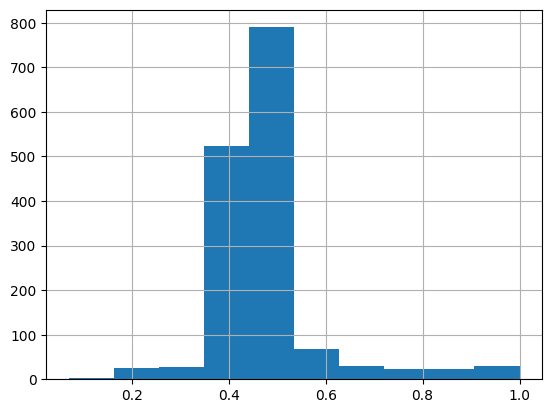

In [49]:
compras_df['PROB_SHEET'].hist()

In [50]:
compras_df[compras_df['PROB_SHEET']>0.95]

,NUM BEN,BENEFICIARIO,RFC,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,...,DIA,MES,ANO,BENEFICIARIO_SALES,IMPORTE_GASTO_PROMEDIO,HAS_LINKEDIN_SITE,CLUSTER_NAME,PROBB_TOTAL,PROB_TOTAL,PROB_SHEET
283,116684,"INDUSTRIAS SOLA BASIC, S.A. DE C.V.",ISB840628IB2,GS106845-158003-5868,SSP-189-2017,MANTENIMIENTO PREVENTIVO Y CORRECTIVO DE LOS T...,TR,604000051.0,2020-12-30,9.000000e+06,...,30,12,2020,2,881659.731797,True,2,0.963661,0.963661,0.953737
353,126224,"BANCO MULTIVA, SA. G.F.M.",BMI061005NY5,FS-23-2020-158004-1712,NO APLICA,FONDO SAPS 23-2020,TR,1019137.0,2020-12-11,9.071256e+06,...,11,12,2020,2,881659.731797,True,3,0.964862,0.964862,0.955151
354,126224,"BANCO MULTIVA, SA. G.F.M.",BMI061005NY5,FS-24-2020-158004-1751,NO APLICA,FONDO SAPS 24-2020,TR,1019152.0,2020-12-18,9.078245e+06,...,18,12,2020,2,881659.731797,True,3,0.964978,0.964978,0.955287
357,126671,"BANCO BANCREA,S.A. ,FIDEICOMISO NUMERO BP417",BBA130722BR7,144-153001-167,NO APLICA,APORTACIÓN MUNICIPAL AL FIDEICOMISO LA GRAN CI...,TR,1019122.0,2020-12-11,3.000000e+07,...,11,12,2020,1,881659.731797,False,3,1.000000,1.000000,1.000000
367,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2020-23-A-158004-1734,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCA ...",TR,11000196.0,2020-12-17,7.386437e+07,...,17,12,2020,16,881659.731797,True,2,1.000000,1.000000,1.000000
368,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2020-23-B-158004-1735,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCO ...",TR,231000103.0,2020-12-17,7.635249e+07,...,17,12,2020,16,881659.731797,True,2,1.000000,1.000000,1.000000
369,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2020-23-C-158004-1733,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCO ...",TR,240000108.0,2020-12-17,1.924614e+07,...,17,12,2020,16,881659.731797,True,2,0.999967,0.999967,0.999929
370,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2020-24-A-158004-1760,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCA ...",TR,11000197.0,2020-12-28,3.610189e+07,...,28,12,2020,16,881659.731797,True,2,1.000000,1.000000,1.000000
372,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2020-24-B-158004-1761,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCO ...",TR,231000104.0,2020-12-28,3.357936e+07,...,28,12,2020,16,881659.731797,True,2,1.000000,1.000000,1.000000
374,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2020-24-C-158004-1759,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCO ...",TR,240000109.0,2020-12-28,1.336286e+07,...,28,12,2020,16,881659.731797,True,2,0.996833,0.996833,0.995149


## Formulando Conclusiones

* Plantear la tendencia central
* Hay historias en los outliers
* Esfuerzate en contestar la pregunta original
* Si tu enfoque cambio documentalo